In [6]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPolygon
from shapely.geometry import shape

Berechnung für neue Reporting Units der Region

Berechung der Reporting Units der Regionen

In [43]:
def new_region_geojson(gdf, name):

  gdf.crs = "EPSG:2056"

  unsettable = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/basis_data/Unbesiedelbar_fixed.gpkg')  
  unsettable = unsettable.to_crs(epsg=2056)

  minx, miny, maxx, maxy = gdf.total_bounds
  selected_unsettable = unsettable.cx[minx:maxx,miny:maxy] 
  clipped_unbsettable = gpd.clip(selected_unsettable['geometry'], gdf['geometry'])
  unsettable_surf = np.sum((clipped_unbsettable.area)/10000) #ha
  geb_surf_ha = np.sum((gdf.area)/10000)
  share_settable = 1 - unsettable_surf/geb_surf_ha

  tot_SSA_surf = geb_surf_ha - unsettable_surf  
  
  tot_inh_2015 = np.sum(gdf["Inhabit_2015"]).astype('int')
  tot_emp_2015 = np.sum(gdf["Employes_2015"]).astype('int')
  tot_inh_2020 = np.sum(gdf["Inhabit_2020"]).astype('int')
  tot_emp_2020 = np.sum(gdf["Employes_2020"]).astype('int')
  tot_inh_2021 = np.sum(gdf["Inhabit_2021"]).astype('int')
  tot_emp_2021 = np.sum(gdf["Employes_2021"]).astype('int')

  gdf['tot_surf'] = tot_SSA_surf
  gdf['tot_share'] = share_settable
  gdf['tot_inh_2015'] = tot_inh_2015
  gdf['tot_inh_2020'] = tot_inh_2020
  gdf['tot_inh_2021'] = tot_inh_2021
  gdf['tot_emp_2015'] = tot_emp_2015
  gdf['tot_emp_2020'] = tot_emp_2020
  gdf['tot_emp_2021'] = tot_emp_2021


  gdf['Name'] = name

  agg_values = {'Name': name,
                'tot_SSA_surf': tot_SSA_surf,
                'tot_share': share_settable,
                'tot_inh_2015': tot_inh_2015,
                'tot_emp_2015': tot_emp_2015,
                'tot_inh_2020': tot_inh_2020,
                'tot_emp_2020': tot_emp_2020,
                'tot_inh_2021': tot_inh_2021,
                'tot_emp_2021': tot_emp_2021}

  geom = gdf.unary_union
  agg_gdf = gpd.GeoDataFrame(agg_values, index=[0], geometry=[geom], crs=gdf.crs)
  
  return agg_gdf


           Name  tot_SSA_surf  tot_share  tot_inh_2015  tot_emp_2015  \
0  Valposchiavo   5883.443585   0.247923          4652          2763   

   tot_inh_2020  tot_emp_2020  tot_inh_2021  tot_emp_2021  \
0          4613          3035          4561          3069   

                                            geometry  
0  POLYGON ((2807946.653 1131319.206, 2807963.398...  
AxesSubplot(0.311132,0.11;0.402735x0.77)


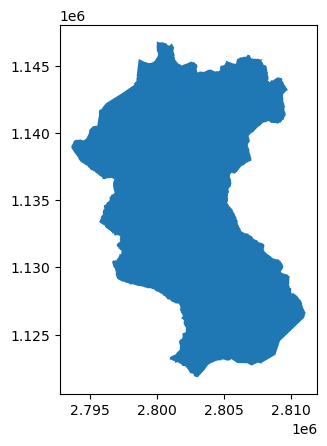

In [44]:
Region_VP = gpd.read_file('~/gitlab/bachelor-arbeit/data/rep_units/Region_VP.geojson')

VP = new_region_geojson(Region_VP, 'Valposchiavo')
print(VP.head())
print(VP.plot())

#VP.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/Union_Region_VP.geojson', driver='GeoJSON')


AxesSubplot(0.272144,0.11;0.480712x0.77)
                       Name  tot_SSA_surf  tot_share  tot_inh_2015  \
0  Unterengadin/Val Müstair  31968.498883   0.267178          9426   

   tot_emp_2015  tot_inh_2020  tot_emp_2020  tot_inh_2021  tot_emp_2021  \
0          7041          9197          7108          9163          6966   

                                            geometry  
0  POLYGON ((2826189.508 1171260.044, 2826197.280...  


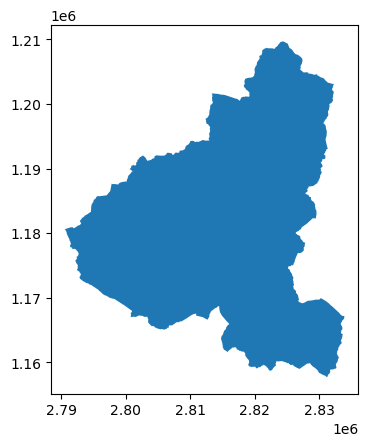

In [45]:
Region_UE_VM = gpd.read_file('~/gitlab/bachelor-arbeit/data/rep_units/Region_UE_VM.geojson')

UE_VM = new_region_geojson(Region_UE_VM, 'Unterengadin/Val Müstair')
print(UE_VM.plot())
print(UE_VM.head())
#UE_VM.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/Union_Region_UE_VM.geojson', driver='GeoJSON')


Berechnung der Reporting Unit der Kantone *(Überprüfen, dass der Anteil an besiedelbaren Flächen richtig angegeben ist)*

In [46]:
def new_kanton_geojson(gdf, name):

  gdf.crs = "EPSG:2056"

  unsettable = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/basis_data/Unbesiedelbar_fixed.gpkg')  
  unsettable = unsettable.to_crs(epsg=2056)

  minx, miny, maxx, maxy = gdf.total_bounds
  selected_unsettable = unsettable.cx[minx:maxx,miny:maxy] 
  clipped_unbsettable = gpd.clip(selected_unsettable['geometry'], gdf['geometry'])

  unsettable_surf = np.sum((clipped_unbsettable.area)/10000) #ha
  geb_surf_ha = (gdf.area)/10000
  share_settable = 1 - unsettable_surf/geb_surf_ha

  tot_SSA_surf = geb_surf_ha - unsettable_surf
  
  
  tot_inh_2015 = gdf["Inhabit_2015"]
  tot_emp_2015 = gdf["Employes_2015"]
  tot_inh_2020 = gdf["Inhabit_2020"]
  tot_emp_2020 = gdf["Employes_2020"]
  tot_inh_2021 = gdf["Inhabit_2021"]
  tot_emp_2021 = gdf["Employes_2021"]

  gdf['tot_surf'] = tot_SSA_surf
  gdf['tot_share'] =  share_settable
  gdf['tot_inh_2015'] = tot_inh_2015
  gdf['tot_inh_2020'] = tot_inh_2020
  gdf['tot_inh_2021'] = tot_inh_2021
  gdf['tot_emp_2015'] = tot_emp_2015
  gdf['tot_emp_2020'] = tot_emp_2020
  gdf['tot_emp_2021'] = tot_emp_2021


  gdf['Name'] = name

  agg_values = {'Name': name,
                'tot_SSA_surf': tot_SSA_surf,
                'tot_share':  share_settable,
                'tot_inh_2015': tot_inh_2015,
                'tot_emp_2015': tot_emp_2015,
                'tot_inh_2020': tot_inh_2020,
                'tot_emp_2020': tot_emp_2020,
                'tot_inh_2021': tot_inh_2021,
                'tot_emp_2021': tot_emp_2021}

  agg_gdf = gpd.GeoDataFrame(agg_values, index=[0], geometry=gdf['geometry'], crs=gdf.crs)
  
  return agg_gdf

            Name  tot_SSA_surf  tot_share  tot_inh_2015  tot_emp_2015  \
0  Kanton Glarus  19442.627188   0.285632         39794         21866   

   tot_inh_2020  tot_emp_2020  tot_inh_2021  tot_emp_2021  \
0         40590         22389         40851         21804   

                                            geometry  
0  MULTIPOLYGON (((2714996.386 1203157.685, 27149...  
AxesSubplot(0.314414,0.11;0.396173x0.77)


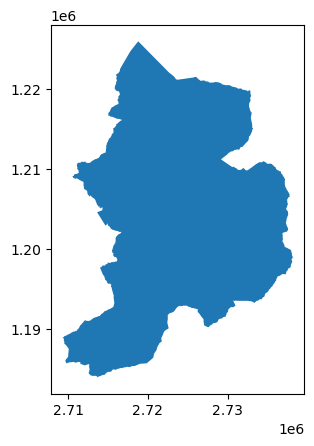

In [47]:
GL = gpd.read_file('~/gitlab/bachelor-arbeit/data/rep_units/Kanton_GL.geojson')

GL = new_kanton_geojson(GL, 'Kanton Glarus')
#GL.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/Kanton_GL_SSA.geojson', driver='GeoJSON')
print(GL.head())
print(GL.plot())


              Name  tot_SSA_surf  tot_share  tot_inh_2015  tot_emp_2015  \
0  Kanton Obwalden  18565.815844   0.386283         36834         21760   

   tot_inh_2020  tot_emp_2020  tot_inh_2021  tot_emp_2021  \
0         37930         22604         38108         22497   

                                            geometry  
0  MULTIPOLYGON (((2661138.933 1180137.027, 26607...  
AxesSubplot(0.125,0.127016;0.775x0.735969)


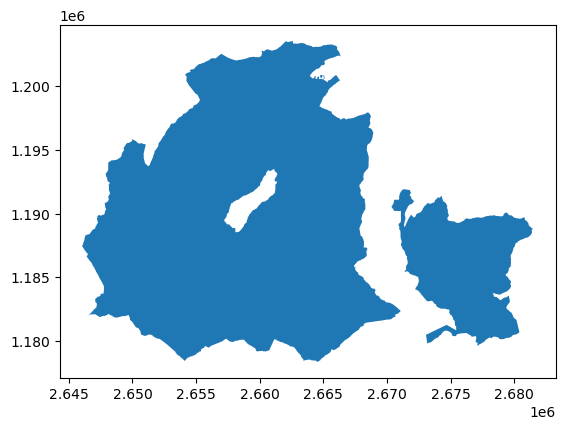

In [48]:
OB = gpd.read_file('~/gitlab/bachelor-arbeit/data/rep_units/Kanton_OB.geojson')

OB = new_kanton_geojson(OB, 'Kanton Obwalden')
print(OB.head())
print(OB.plot())

#OB.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/Kanton_OB_SSA.geojson', driver='GeoJSON')

Berechnung für die weitere Reporting Units nach Variante 1

In [1]:
def clip_empl(empl_20, empl_15, surf):
    crs = {'init': 'epsg:2056'} 

    geometry_empl_20 = [Point(xy) for xy in zip(empl_20['E_KOORD'], empl_20['N_KOORD'])]
    empl_20 = empl_20.drop(['E_KOORD', 'N_KOORD'], axis=1)
    round_empl_20 = round(empl_20['B08VZAT'], 0)
    employee_20 = round_empl_20.astype(int)
    gdf_empl_20 = gpd.GeoDataFrame(employee_20, crs=crs, geometry=geometry_empl_20)
    clipped_empl_20 = gpd.overlay(gdf_empl_20, surf, how='intersection')

    geometry_empl_15 = [Point(xy) for xy in zip(empl_15['E_KOORD'], empl_15['N_KOORD'])]
    empl_15 = empl_15.drop(['E_KOORD', 'N_KOORD'], axis=1)
    round_empl_15 = round(empl_15['B08VZAT'], 0)
    employee_15 = round_empl_15.astype(int)
    gdf_empl_15 = gpd.GeoDataFrame(employee_15, crs=crs, geometry=geometry_empl_15)
    clipped_empl_15 = gpd.overlay(gdf_empl_15, surf, how='intersection')

    return clipped_empl_20, clipped_empl_15


In [2]:
def clip_inh(inh_21, inh_20, inh_15, surf):
    crs = {'init': 'epsg:2056'} 

    geometry_inh_21 = [Point(xy) for xy in zip(inh_21['E_KOORD'], inh_21['N_KOORD'])]
    inh_21 = inh_21.drop(['E_KOORD', 'N_KOORD'], axis=1)
    gdf_inh_21 = gpd.GeoDataFrame(inh_21['B21BTOT'], crs=crs, geometry=geometry_inh_21)
    clipped_inh_21 = gpd.overlay(gdf_inh_21, surf, how='intersection')

    geometry_inh_20 = [Point(xy) for xy in zip(inh_20['E_KOORD'], inh_20['N_KOORD'])]
    inh_20 = inh_20.drop(['E_KOORD', 'N_KOORD'], axis=1)
    gdf_inh_20 = gpd.GeoDataFrame(inh_20['B20BTOT'], crs=crs, geometry=geometry_inh_20)
    clipped_inh_20 = gpd.overlay(gdf_inh_20, surf, how='intersection')

    geometry_inh_15 = [Point(xy) for xy in zip(inh_15['E_KOORD'], inh_15['N_KOORD'])]
    inh_15 = inh_15.drop(['E_KOORD', 'N_KOORD'], axis=1)
    gdf_inh_15 = gpd.GeoDataFrame(inh_15['B15BTOT'], crs=crs, geometry=geometry_inh_15)
    clipped_inh_15 = gpd.overlay(gdf_inh_15, surf, how='intersection')

    return clipped_inh_21, clipped_inh_20, clipped_inh_15

In [3]:
def new_rep_units(gdf, name):

    inhabitant_21 = pd.read_csv('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/STATPOP2021.csv', delimiter=';')
    inhabitant_20 = pd.read_csv('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/STATPOP2020.csv', delimiter=';')
    inhabitant_15 = pd.read_csv('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/STATPOP2015.csv', delimiter=',')

    employee_20 = pd.read_csv('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/STATENT_2020.csv', delimiter=';') #keine Datensatz für 2021
    employee_15 = pd.read_csv('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/STATENT_N08_2015.csv', delimiter=';') #B08EMPT=Beschäftigte oder B08VZAT=Vollzeitäquivalente

    unsettable = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/basis_data/Unbesiedelbar_fixed.gpkg')  

    gdf.crs = "EPSG:2056"
    unsettable = unsettable.to_crs(epsg=2056)

    #clip unbesiedelbare Fläche 
    minx, miny, maxx, maxy = gdf.total_bounds
    selected_unbesiedel = unsettable.cx[minx:maxx,miny:maxy] 
    clipped_unbesiedel = gpd.clip(selected_unbesiedel['geometry'], gdf['geometry'])

    #clip inhabitant and employee
    clipped_inh_21, clipped_inh_20, clipped_inh_15 = clip_inh(inhabitant_21, inhabitant_20, inhabitant_15, gdf)
    clipped_empl_20, clipped_empl_15 = clip_empl(employee_20, employee_15, gdf)

    #anzahl empl and inh
    tot_inh_2021 = np.sum(clipped_inh_21).iloc[0]
    tot_inh_2020 = np.sum(clipped_inh_20).iloc[0]
    tot_inh_2015 = np.sum(clipped_inh_15).iloc[0]

    tot_emp_2020 = np.sum(clipped_empl_20).iloc[0]
    tot_emp_2015 = np.sum(clipped_empl_15).iloc[0]

    #total besiedelbare Fläche und share
    area_surf_ha = (gdf.area)/10000 #polygon surface ha
    area_surf_ha = np.sum(area_surf_ha)
    unbesie_surf = np.sum((clipped_unbesiedel.area)/10000) #ha #clipped
    share_besidelbar = 1 - unbesie_surf/area_surf_ha 
    tot_SSA_surf = area_surf_ha - unbesie_surf
    

    #new dataset
    gdf['tot_SSA_surf_ha'] = tot_SSA_surf
    gdf['tot_share'] = share_besidelbar 
    gdf['tot_inh_2021'] = tot_inh_2021
    gdf['tot_emp_2020'] = tot_emp_2020
    gdf['tot_inh_2020'] = tot_inh_2020
    gdf['tot_emp_2015'] = tot_emp_2015
    gdf['tot_inh_2015'] = tot_inh_2015
    gdf['Name'] = name

    agg_values = {'Name': name,
                  'tot_SSA_surf': tot_SSA_surf,
                  'tot_share': share_besidelbar,
                  'tot_inh_2021': tot_inh_2021,
                  'tot_emp_2020': tot_emp_2020,
                  'tot_inh_2020': tot_inh_2020,
                  'tot_emp_2015': tot_emp_2015,
                  'tot_inh_2015': tot_inh_2015,
                  }

    geom = gdf.unary_union
    agg_gdf = gpd.GeoDataFrame(agg_values, index=[0], geometry=[geom], crs=gdf.crs)
    
    return agg_gdf


/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

           Name  tot_SSA_surf  tot_share  tot_inh_2021  tot_emp_2020  \
0  Region Scuol   2551.810566   0.398292          4473          2584   

   tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0          4458          2552          4527   

                                            geometry  
0  POLYGON ((2813222.754 1188033.334, 2812332.063...  
AxesSubplot(0.125,0.117049;0.775x0.755901)


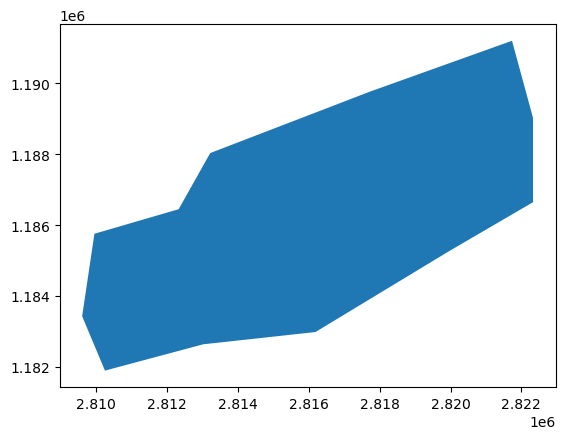

In [66]:
Scuol_polygon = gpd.read_file('~/gitlab/bachelor-arbeit/data/rep_units/Scuol_polygon.geojson')
#polygon = gpd.read_file('/Users/petole/Desktop/map.geo.admin.ch_KML_20230429022726.kml', driver='ogr')

rep_unit = new_rep_units(Scuol_polygon, 'Region Scuol')
#scuol.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/scuol_new_rep_unit.geojson', driver='GeoJSON')
print(rep_unit.head())
print(rep_unit.plot())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

               Name  tot_SSA_surf  tot_share  tot_inh_2021  tot_emp_2020  \
0  ÖV-Güterklasse A  21025.228843   0.928625       1481443       1436255   

   tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0       1479449       1388429       1425381   

                                            geometry  
0  MULTIPOLYGON (((2571737.911 1105909.015, 25716...  
AxesSubplot(0.125,0.124381;0.775x0.741239)


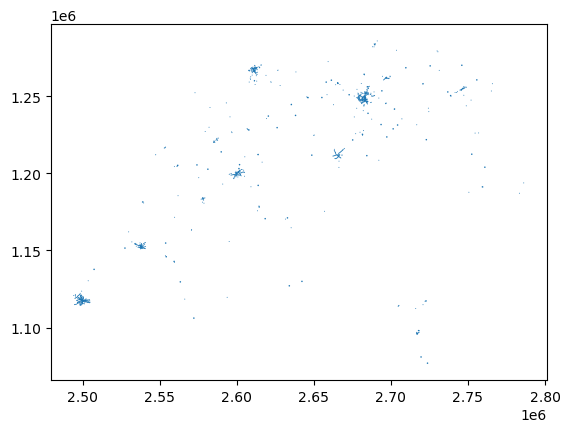

In [67]:
gueterklasse = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/gueteklassen_oev_2021_2056.gpkg/OeV_Gueteklassen_ARE.gpkg')  
#print(gueterklasse.head())

A = gueterklasse[gueterklasse['Klasse'] == 'A']
#print(A)

oev = new_rep_units(A, 'ÖV-Güterklasse A')
#oev.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/oev_A_new_rep_unit.geojson', driver='GeoJSON')
print(oev.head())
print(oev.plot())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                                Name  tot_SSA_surf  tot_share  tot_inh_2021  \
0  ÖV-Güterklasse in Kanton Obwalden   1394.244492    0.81894         20544   

   tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0         12700         20346         12281         19654   

                                            geometry  
0  MULTIPOLYGON (((2653758.056 1178755.244, 26536...  
AxesSubplot(0.20482,0.11;0.615359x0.77)


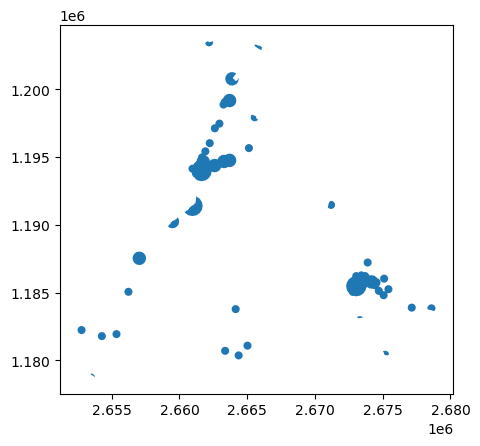

In [68]:
gueterklasse = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/gueteklassen_oev_2021_2056.gpkg/OeV_Gueteklassen_ARE.gpkg')  
OB = gpd.read_file('~/gitlab/bachelor-arbeit/data/rep_units/Kanton_OB.geojson')
clipped_oev = gpd.overlay(gueterklasse, OB, how='intersection')

oev_OB = new_rep_units(clipped_oev, 'ÖV-Güterklasse in Kanton Obwalden')
#oev_OB.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/oev_OB_new_rep_unit.geojson', driver='GeoJSON')
print(oev_OB.head())
print(oev_OB.plot())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                          Name  tot_SSA_surf  tot_share  tot_inh_2021  \
0  Bauzonen in Kanton Obwalden    991.940696   0.986162         23279   

   tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0         13419         22907         13128         22127   

                                            geometry  
0  MULTIPOLYGON (((2653849.986 1180732.977, 26538...  
AxesSubplot(0.187263,0.11;0.650474x0.77)


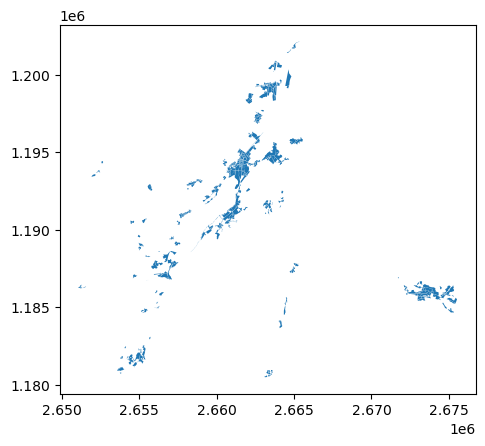

In [69]:
bauzonen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/ch.are.bauzonen/ch.are.bauzonen.gpkg')
#print(bauzonen.head())
OB = gpd.read_file('~/gitlab/bachelor-arbeit/data/rep_units/Kanton_OB.geojson')
clipped_bauzonen = gpd.overlay(bauzonen, OB, how='intersection')

bau_OB = new_rep_units(clipped_bauzonen, 'Bauzonen in Kanton Obwalden')
#bau_OB.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/bauzonen_OB_new_rep_unit.geojson', driver='GeoJSON')
print(bau_OB.head())
print(bau_OB.plot())

   CH_CODE_HN    CH_BEZ_D            CH_BEZ_F  BFS_NO             NAME  KT_NO  \
0          11   Wohnzonen  Zones d'habitation       1  Aeugst am Albis      1   
1          11   Wohnzonen  Zones d'habitation       1  Aeugst am Albis      1   
2          11   Wohnzonen  Zones d'habitation       1  Aeugst am Albis      1   
3          11   Wohnzonen  Zones d'habitation       1  Aeugst am Albis      1   
4          13  Mischzonen        Zones mixtes       1  Aeugst am Albis      1   

  KT_KZ  FLAECHE                                           geometry  
0    ZH    59130  POLYGON ((2679502.213 1235591.309, 2679508.231...  
1    ZH     9727  POLYGON ((2679007.637 1237366.941, 2678996.160...  
2    ZH   165423  POLYGON ((2678854.882 1236370.383, 2678912.903...  
3    ZH    45918  POLYGON ((2679776.343 1236024.793, 2679793.807...  
4    ZH    35188  POLYGON ((2679386.922 1237578.777, 2679438.460...  


/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                                          Name  tot_SSA_surf  tot_share  \
0  Bauzonen im Region Unterengadin/Val Müstair    434.556993   0.984182   

   tot_inh_2021  tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0          5327          3442          5385          3566          5494   

                                            geometry  
0  MULTIPOLYGON (((2798334.958 1169984.892, 27983...  
AxesSubplot(0.277977,0.11;0.469046x0.77)


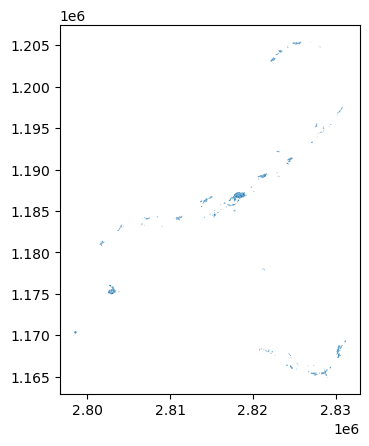

In [70]:
bauzonen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/ch.are.bauzonen/ch.are.bauzonen.gpkg')
print(bauzonen.head())
UE_VM = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/Region_UE_VM.geojson')
clipped_bauzonen = gpd.overlay(bauzonen, UE_VM, how='intersection')

bau_UE_VM = new_rep_units(clipped_bauzonen, 'Bauzonen im Region Unterengadin/Val Müstair')
#bau_UE_VM.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/bauzonen_UE_VM_new_rep_unit.geojson', driver='GeoJSON')
print(bau_UE_VM.head())
print(bau_UE_VM.plot())

In [35]:
poly_sarnen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/poly_sarnen.geojson')
poly_sarnen = poly_sarnen.to_crs(epsg=2056)

rep_sarnen = new_rep_units(poly_sarnen, 'Polygon um ÖV-Güterklasse Sarnen')
#rep_sarnen.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/sarnen_OB_new_rep_unit.geojson', driver='GeoJSON')
print(rep_sarnen.head())
# print(rep_sarnen.plot())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                               Name  tot_SSA_surf  tot_share  tot_inh_2021  \
0  Polygon um ÖV-Güterklasse Sarnen    674.588186   0.879821         10443   

   tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0          8757         10425          1568         10109   

                                            geometry  
0  POLYGON ((2661955.001 1196385.001, 2660565.001...  


/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                                Name  tot_SSA_surf  tot_share  tot_inh_2021  \
0  Polygon um ÖV-Güterklasse Ramosch    112.145213   0.549492           340   

   tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0           170           350           160           365   

                                            geometry  
0  POLYGON ((2824385.001 1191652.501, 2823800.001...  
AxesSubplot(0.191254,0.11;0.642492x0.77)


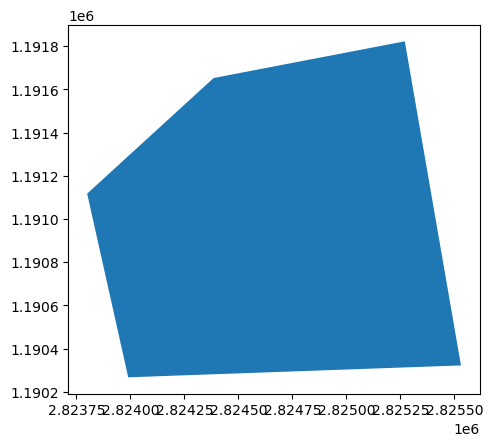

In [71]:
poly_ramosch = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/ramosch_UE_VM_new_rep_unit.geojson')

rep_ramosch = new_rep_units(poly_ramosch, 'Polygon um ÖV-Güterklasse Ramosch')
#rep_ramosch.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/ramosch_UE_VM_new_rep_unit_ber.geojson', driver='GeoJSON')
print(rep_ramosch.head())
print(rep_ramosch.plot())

In [10]:
sarnen = gpd.read_file('data/rep_units/input/gem_Sarnen.geojson')
bauzonen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/ch.are.bauzonen/ch.are.bauzonen.gpkg')

bauzonen_sarnen = gpd.overlay(bauzonen, sarnen, how='intersection')

bau_sarnen = new_rep_units(bauzonen_sarnen, 'Bauzonen im Gemeinde Sarnen (Methode 1)')
print(bau_sarnen.area)
#bau_sarnen.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/bauzonen_sarnen_new_rep_unit1.geojson', driver='GeoJSON')
# print(bau_sarnen.plot())
# print(bau_sarnen.head())


KeyboardInterrupt: 

In [11]:
scuol = gpd.read_file('data/rep_units/input/gem_Scuol.geojson')
bauzonen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/ch.are.bauzonen/ch.are.bauzonen.gpkg')

bauzonen_scuol = gpd.overlay(bauzonen, scuol, how='intersection')

bau_scuol = new_rep_units(bauzonen_scuol, 'Bauzonen im Gemeinde Scuol (Methode 1)')
print(bau_scuol.area)
# bau_scuol.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/bauzonen_scuol_new_rep_unit1.geojson', driver='GeoJSON')
# print(bau_scuol.plot())
# print(bau_scuol.head())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

0    1.958454e+06
dtype: float64


   Name description timestamp begin   end altitudeMode  tessellate  extrude  \
0  None                  None  None  None         None          -1        0   

   visibility drawOrder  icon         type  \
0          -1      None  None  linepolygon   

                                            geometry  
0  POLYGON ((2824253.001 1191256.001, 2824413.001...  


/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                          Name  tot_SSA_surf  tot_share  tot_inh_2021  \
0  Polygon um Bauzonen Ramosch      7.914816   0.918107           195   

   tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0            49           204            47           219   

                                            geometry  
0  POLYGON ((2824253.001 1191256.001, 2824413.001...  
AxesSubplot(0.154929,0.11;0.715142x0.77)


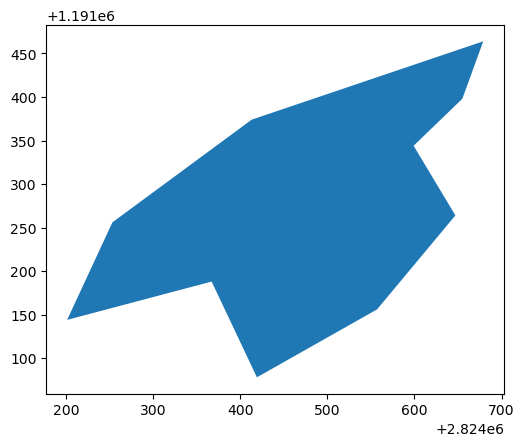

In [5]:
poly_ramosch2 = gpd.read_file('data/rep_units/ramosch2_UE_VM.geojson')
print(poly_ramosch2.head())

rep_ramosch2 = new_rep_units(poly_ramosch2, 'Polygon um Bauzonen Ramosch')
#rep_ramosch2.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/ramosch2_UE_VM_new_rep_unit_ber.geojson', driver='GeoJSON')
print(rep_ramosch2.head())
print(rep_ramosch2.plot())

Berechnung für die weitere Reporting Units nach Variante 2

In [4]:
def test_rep_unit_2(gdf, muni, name):
    
    rep = new_rep_units(gdf, name)

    geom = muni.unary_union  
    
    agg_gdf = gpd.GeoDataFrame(rep, index=[0], geometry=[geom], crs=gdf.crs)

    return agg_gdf

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                           Name  tot_SSA_surf  tot_share  tot_inh_2021  \
0  Bauzonen auf Gemeinde Sarnen    279.302493   0.978946          7010   

   tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0          5325          6905          5087          6708   

                                            geometry  
0  MULTIPOLYGON (((2657611.596 1190375.488, 26576...  
AxesSubplot(0.125,0.154256;0.775x0.681488)


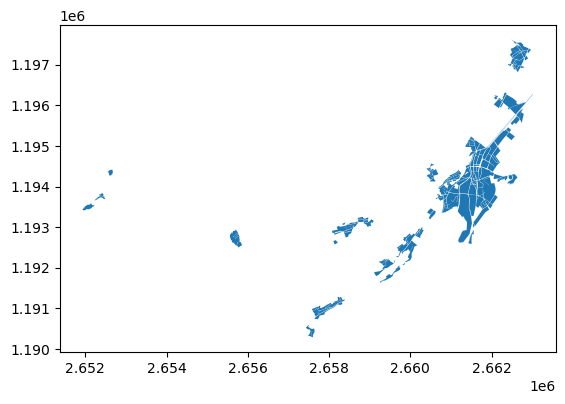

In [9]:
bauzonen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/ch.are.bauzonen/ch.are.bauzonen.gpkg')
#print(bauzonen.head())
Sarnen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/gem_Sarnen.geojson')
clipped_bauzonen_Sarnen = gpd.overlay(bauzonen, Sarnen, how='intersection')

bau_sarn = new_rep_units(clipped_bauzonen_Sarnen, 'Bauzonen auf Gemeinde Sarnen')
print(bau_sarn.head())
print(bau_sarn.plot())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                           Name  tot_SSA_surf  tot_share  tot_inh_2021  \
0  Bauzonen auf Gemeinde Sarnen    279.302493   0.978946          7010   

   tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0          5325          6905          5087          6708   

                                            geometry  
0  POLYGON ((2657300.728 1189635.279, 2657285.003...  
AxesSubplot(0.125,0.21577;0.775x0.55846)


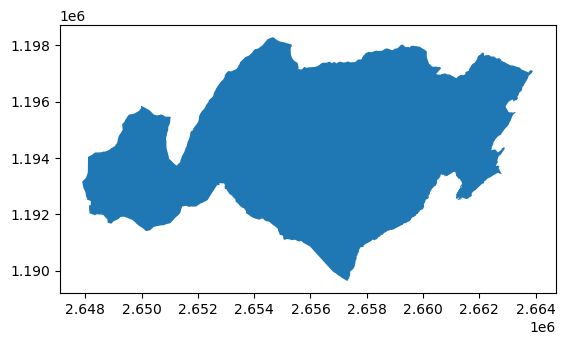

In [8]:
sarn = test_rep_unit_2(clipped_bauzonen_Sarnen, Sarnen, 'Bauzonen auf Gemeinde Sarnen')
#sarn.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/bauzonen_sarnen_new_rep_unit2.geojson', driver='GeoJSON')
print(sarn.head())
print(sarn.plot())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                          Name  tot_SSA_surf  tot_share  tot_inh_2021  \
0  Bauzonen auf Gemeinde Scuol    191.457533   0.977595          2953   

   tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0          1759          2981          1982          3004   

                                            geometry  
0  POLYGON ((2812956.113 1194956.023, 2813629.130...  
AxesSubplot(0.265107,0.11;0.494787x0.77)


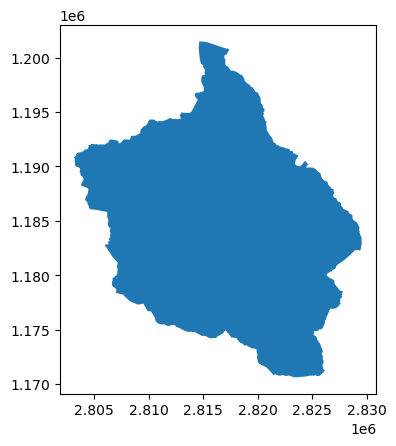

In [7]:
bauzonen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/ch.are.bauzonen/ch.are.bauzonen.gpkg')
#print(bauzonen.head())
Scuol = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/gem_Scuol.geojson')
clipped_bauzonen_Scuol = gpd.overlay(bauzonen, Scuol, how='intersection')

scu = test_rep_unit_2(clipped_bauzonen_Scuol, Scuol, 'Bauzonen auf Gemeinde Scuol')
#print(scu.area)
# scu.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/bauzonen_scuol_new_rep_unit2.geojson', driver='GeoJSON')
print(scu.head())
print(scu.plot())

AxesSubplot(0.125,0.154256;0.775x0.681488)
AxesSubplot(0.125,0.21577;0.775x0.55846)


/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/geopandas/tools/overlay.py:365: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[is_collection, geom_col] = dissolved[geom_col].values
/var/folders/pf/755fzzzn0vb5tgxc1x7ftxxw0000gn/T/ipykernel_41901/3720860886.py:6: UserWarning: `keep_geom_type=True` in overlay resulted in 89 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  diff_bauzonen_Sarnen = gpd.overlay(Sarnen, clip, how='difference')


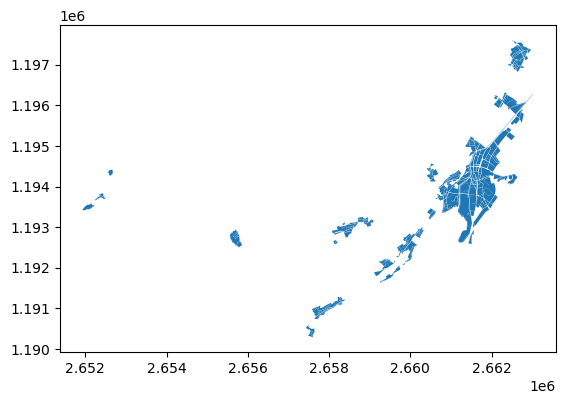

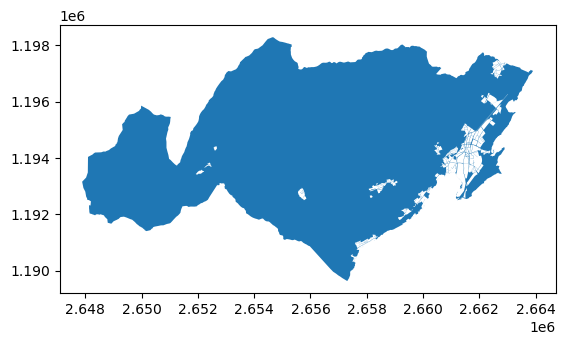

In [17]:
bauzonen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/ch.are.bauzonen/ch.are.bauzonen.gpkg')
#print(bauzonen.head())
Sarnen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/gem_Sarnen.geojson')
clip = gpd.overlay(bauzonen,Sarnen, how='intersection')
print(clip.plot())
diff_bauzonen_Sarnen = gpd.overlay(Sarnen, clip, how='difference')
print(diff_bauzonen_Sarnen.plot())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                                          Name  tot_SSA_surf  tot_share  \
0  ausserhalb der Bauzonen auf Gemeinde Sarnen   2004.089867   0.285186   

   tot_inh_2021  tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0          3770          1919          3737          1751          3640   

                                            geometry  
0  POLYGON ((2657300.728 1189635.279, 2657285.003...  
AxesSubplot(0.125,0.21577;0.775x0.55846)


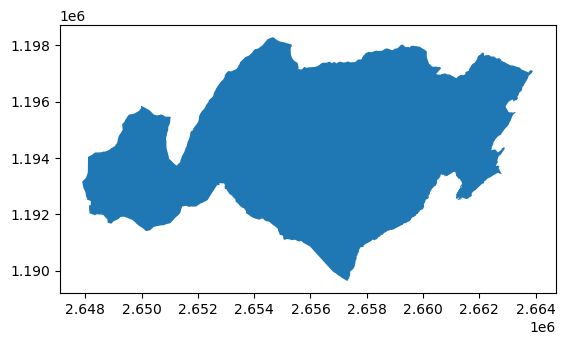

In [21]:
sar_aus = test_rep_unit_2(diff_bauzonen_Sarnen, Sarnen, 'ausserhalb der Bauzonen auf Gemeinde Sarnen')
sar_aus.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/bauzonen_aus_sarnen_new_rep_unit2.geojson', driver='GeoJSON')
print(sar_aus.head())
print(sar_aus.plot())

AxesSubplot(0.125,0.131571;0.775x0.726858)
AxesSubplot(0.265107,0.11;0.494787x0.77)


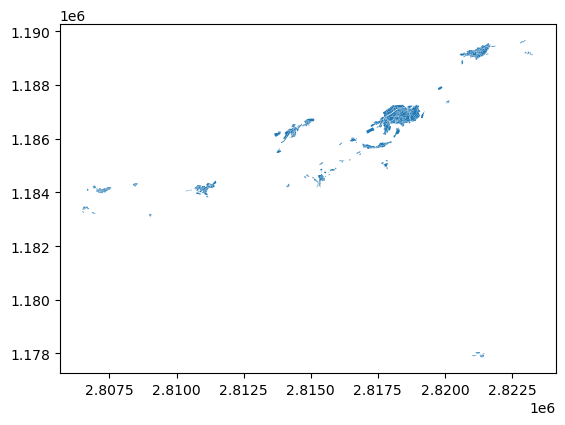

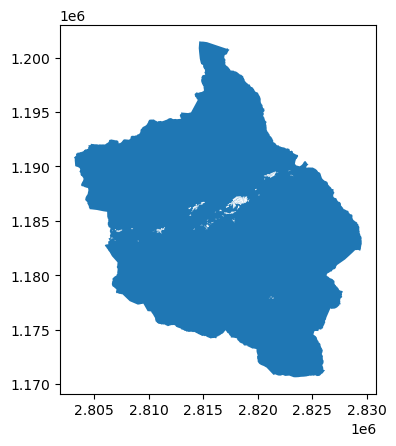

In [22]:
bauzonen = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/ch.are.bauzonen/ch.are.bauzonen.gpkg')
#print(bauzonen.head())
Scuol = gpd.read_file('/Users/petole/gitlab/bachelor-arbeit/data/rep_units/input/gem_Scuol.geojson')
clip = gpd.overlay(bauzonen,Scuol, how='intersection')
print(clip.plot())
diff_bauzonen_Scuol = gpd.overlay(Scuol, clip, how='difference')
print(diff_bauzonen_Scuol.plot())

/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/petole/opt/miniconda3/envs/GTA22/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<c

                                         Name  tot_SSA_surf  tot_share  \
0  ausserhalb der Bauzonen auf Gemeinde Scuol  12901.223761   0.295461   

   tot_inh_2021  tot_emp_2020  tot_inh_2020  tot_emp_2015  tot_inh_2015  \
0          1794          1009          1744           846          1776   

                                            geometry  
0  POLYGON ((2812956.113 1194956.023, 2813629.130...  
AxesSubplot(0.265107,0.11;0.494787x0.77)


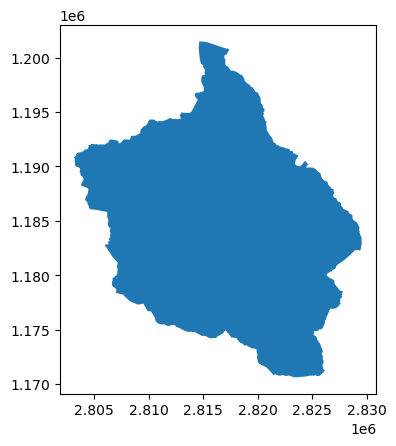

In [24]:
scu_aus = test_rep_unit_2(diff_bauzonen_Scuol, Scuol, 'ausserhalb der Bauzonen auf Gemeinde Scuol')
scu_aus.to_file('/Users/petole/gitlab/bachelor-arbeit/data/new_rep_units/bauzonen_aus_scuol_new_rep_unit2.geojson', driver='GeoJSON')
print(scu_aus.head())
print(scu_aus.plot())